# ESOC Research Document Analysis

This section provides and overview of the ESOC journals dating from 2010-2012. The journals underwent an in-processing procedure and were turned into a collective ".csv" file with thier data arranged into columns accordning to the template journal document. That ".csv" can then be loaded into a pandas dataframe for analysis:

In [8]:
import pandas as pd
import os
esoc_all_data = pd.read_csv("ESOC_All_Data_2010_2012.csv")
#Set date column to pandas datetime
esoc_all_data['Date'] =  pd.to_datetime(esoc_all_data['Date'], format='%d %b %Y')

## Summary Data

In [9]:
print esoc_all_data.count().sort_values()

Unnamed: 17                  0
Firearms Losses              0
Civilian Side              615
Enemy Side                1006
Firearms Gained           1029
Government Side           1070
Items Recovered / Loss    1440
Other Details             5096
Action Taken              7222
Region                    9823
Summary Report            9831
Report RN                 9840
Type of Engagement        9840
Date                      9841
Province                  9841
Reference                 9841
Unified Command           9841
Journal Code              9841
dtype: int64


## Journal Codes

In [304]:
import re
jc_array = esoc_all_data["Journal Code"]
jc_total = jc_array.count()
emc_total = len(filter(re.compile("\D{3}\d{5}").match,jc_array))
print "There are a total of {0:2d} journal entires of which {1:d} have the EMC prefix.".format(jc_total, emc_total)

There are a total of 9841 journal entires of which 2725 have the EMC prefix.


## Unified Commands

In [177]:
from tabulate import tabulate
#Method to count column types
def type_counts(group,toCount):
    return group[toCount].value_counts()

#Get list of commands
commands = df["Unified Command"].unique()

#Group by item
command_grouping = esoc_all_data.groupby("Unified Command")

#Find results
command_results = command_grouping.apply(type_counts, "Region").unstack(0).fillna(0)

print command_results

Unified Command     CENTCOM   EASTMINCOM   NCRCOM   NOLCOM   SOLCOM   WESCOM   \
1                        0.0          3.0      0.0      0.0      0.0      0.0   
10                       0.0          4.0      0.0      0.0      1.0      0.0   
100                      0.0          1.0      0.0      0.0      0.0      0.0   
101                      0.0          2.0      0.0      0.0      0.0      0.0   
103                      0.0          1.0      0.0      0.0      0.0      0.0   
105                      0.0          1.0      0.0      0.0      0.0      0.0   
106                      0.0          1.0      0.0      0.0      0.0      0.0   
11                       0.0          5.0      0.0      0.0      0.0      0.0   
110                      0.0          1.0      0.0      0.0      0.0      0.0   
111                      0.0          2.0      0.0      0.0      0.0      0.0   
112                      0.0          0.0      0.0      0.0      0.0      0.0   
113                      0.0

## Regions

In [167]:
#Get list of regions
regions = df["Region"].unique()

#Group by item
region_group = esoc_all_data.groupby("Region")

#Find results
region_results = region_group.apply(type_counts, "Province").unstack(0)

# Get list of all regions each command is in and counts of involvement
regProvinces = dict.fromkeys(region_results, [])

for reg in regions:
    hold = region_results[reg].dropna(axis=0)
    regProvinces[reg] = hold.keys()
print regProvinces["ARMM"]

Index([u' ', u'ABRA ', u'AGUSAN DEL SUR ', u'BASILAN ', u'BASILAN  ',
       u'BASILAN PROVINCE ', u'BASILANBASILAN ',
       u'COMPOSTELA VALLEY PROVINCE ', u'COMPOSTELA VALLEY PROVINCE  ',
       u'COTABATO ', u'COTABATO  ', u'COTABATO CITY ', u'DAVAO ORIENTAL ',
       u'JULU ', u'LANAO DEL NORTE ', u'LANAO DEL SUR ', u'LANAO DEL SUR  ',
       u'LDS ', u'MAGINDANAO ', u'MAGUINDANAO ', u'MAGUINDANAO  ', u'MARAWI ',
       u'MARAWI  ', u'MARAWI CITY ', u'MMAGUINDANAO ', u'SARANGANI ',
       u'SARANGANI  ', u'SARANGANI PROVINCE ', u'SHARIFF AGUAK, MAGUINDANAO ',
       u'SHARIFF KABUNSUAN ', u'SULTAN KUDARAT ', u'SULU ', u'SULU  ',
       u'SURIGAO DEL NORTE ', u'SURIGAO DEL SUR ', u'TAWI-TAWI ',
       u'TAWI-TAWI  ', u'TAWI_TAWI ', u'ZAMBOANGA DEL SUR  ',
       u'ZAMBOANGA DEL SUR, ZDN, ZSP '],
      dtype='object')


## Province

In [165]:
#Get list of provinces
provinces = df["Province"].unique()

#Group by item
province_group = esoc_all_data.groupby("Province")

#Find results
province_results = province_group.apply(type_counts, "Type of Engagement").unstack(0)

#Get list of all regions each command is in and counts of involvement
provEngagement = dict.fromkeys(province_results,[])

for prov in provinces:
    hold = province_results[prov].dropna(axis=0)
    provEngagement[prov] = hold.keys()
    print hold

AMBUSH                                        3.0
APPREHENSION                                  2.0
ARMED CLASH                                   2.0
BURNING                                       1.0
DETONATING OF RPG AMMO                        1.0
ENCOUNTER                                     8.0
HARASSMENT                                    2.0
INDISCRIMINATE FIRING                         1.0
KIDNAPPING                                    1.0
LAND MINING                                   2.0
RECOVERY OF CADAVERS                          2.0
RECOVERY OF FA                                1.0
RECOVERY OF IED                               1.0
RESCUE OPERATIONS                             2.0
SHOOTING                                      3.0
UNRULY BEHAVIOR OF LCE "THUNDER" PERSONNEL    1.0
VEHICULAR ACCIDENT                            2.0
Name: BASILAN  , dtype: float64
ABDUCTION                              8.0
ACCIDENT (GENERAL                      3.0
ACCIDENTAL FIRING               

Name: BATANGAS , dtype: float64
ACCIDENT (GENERAL            1.0
AMBUSH                       4.0
APPREHENSION                 8.0
ARSON                        1.0
CAPTURED                     1.0
CRIMINALITY                  1.0
DEATH BY NATURAL CAUSES      1.0
ENCOUNTER                   13.0
HARASSMENT                  12.0
ILLEGAL LOGGING              2.0
INDISCRIMINATE FIRING        1.0
LIQUIDATION                  4.0
RECOVERY OF CADAVERS         1.0
RECOVERY OF WAR MATERIEL     1.0
SHOOTING                     6.0
SNIPING                      1.0
STABBING                     1.0
SUICIDE                      1.0
SURRENDER                    4.0
VEHICULAR ACCIDENT           3.0
Name: ALBAY , dtype: float64
ACCIDENT (GENERAL                1.0
AIR MISHAP                       1.0
AMBUSH                           1.0
ANTI-ILLEGAL MINING ACTIVITY     1.0
APPREHENSION                    10.0
CAPTURED                         1.0
CONFISCATION                     1.0
DEATH BY NATURAL CAU

## Type of Engagement

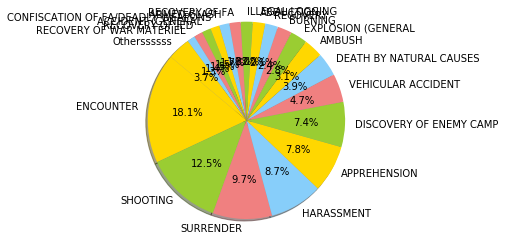

In [219]:
#Get series to count number of engagements
to_chart = all_data["Type of Engagement"].value_counts()

#Filter those types that have less than 5 occurances and 
sig_engage = to_chart[to_chart > 100 ]
other_count = to_chart[to_chart <= 100 ].count()

#Data to plot
labels = list(sig_engage.keys())
sizes = list(sig_engage.values)
labels.append("Other")
sizes.append(other_count)

import matplotlib.pyplot as plt

 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

## Report RN

## Reference

## Enemy Side

In [15]:
import numpy as np
esoc_all_data = esoc_all_data.replace(np.nan, '', regex=True)
for enemy in esoc_all_data["Government Side"]:
    print enemy.split("/")

['WIA', 'Cpl  Edwin M Romero 792675 ', 'Sgt Robbel Gemmo M Rodriquez 794222 ']
['KIA', 'Pvt Arman S Dinero 886444 ']
['']
['WIA', '  Names not reported    ']
['WIA', 'Pfc Richard G Monte   ']
['WIA', '1LT MICHAEL B  ASISTORES  0-15167  ', 'Sgt Gil G Goyo  815222  ', 'Cpl  Victor C   Sabud 842441 ', 'Pfc  Marven I Oliveros   856710 ']
['']
['WIA TSgt Aladdin Reyes 802772  Pfc Rowel B Candasan 865661 ']
['']
['']
['WIA', 'A2C Junryl L Lingcopinas    ', '1LT  RORON  Z ZAMBRONA    ', ' Sgt Noel Rosales   ']
['']
['WIA', 'TSgt Robin Aladin A Reyes 802772 ', 'Cpl  Rodel D Macapili  840196 ', 'Pfc Rowel B  Candasa 865561 ']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['WIA', 'CAA Arnold Adorio G10-000198 ', 'CAA Celso C Talimodao   ']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'MAJ JULISTIDU U ARASID    ', 'CAA  Lito M Dela Cruz   ', 'WIA', 'CAA Ferderico  A Luchavez   ']
['WIA', 'PINSP PHILMORE DUMAGAT   ', 'P01 Jesus Dumaog   ']
['']
['']
[

['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'Pfc Lito S  Ino 852646 PA']
['']
['']
['']
['']
['']
['']
['KIA', 'CDR ALBERT S NEBRE  PN']
['KIA', 'A2C Joeman Articulo  PAF']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['WIA', 'Pfc Marion Jay C Verdun 866209 PA']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['Captured', 'Cpl Daiem A Hadjaie 813144 ']
['']
['']
['']
['']
['KIA', 'CAA  Marcelino B  Macatunao G07-000061 ']
['']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'SCAA  Noel T  Enolva  GO-012648 ', 'SCAA  Ju

['']
['KIA', 'Cpl Jerry R  Sacayan  801395  PA', 'WIA', 'Pfc Vincent B  Tomo  873839  PA', 'Pfc   Kizal M  Sahibudin  873521 PA', 'Pfc Alwin V  Piala 873842 PA']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['KIA Pfc Dexter C Bagasin 847835 PA']
['']
['']
['']
['']
['WIA', 'Pvt Dennis N Rodriqueza   PA']
['']
['']
['KIA', 'P02  Danilo Grajo  Detablan  PNP']
['KIA', 'PFC  Junnie B  MItra 840295  PA', 'Firearms Losses: ', 'Loss', '1 - Cal .45 pistol (sn: 01071854)']
['KIA', 'Pfc Junnie B  MItra   840295 PA ', 'Firearms Losses: ', '1 - one (1) cal. 45 (sn:  01071854)']
['']
['WIA', 'Cpl Audie E Estioco 804591 PA', 'Pfc Albert J Borja 881835 PA', 'CAA Melchor M Monticod MS-G09-000 CAA', 'CAA Anastacio C Del Rosario MS-G08-000 CAA']
['WIA', 'Pfc Nick S  Jarlego  PA']
['']
['']
['']
['']
['']
['']
['']
['WIA', 'MAJ  GARCIA  PA']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['WIA', 'Pfc Nielfer S Aclao 868055 PA', 'Pfc Richard Bryan R Alcaras 88351

['WIA', 'Sgt  Pascua  PA', 'Pvt  Danos  PA']
['']
['KIA', 'CAA Emar Surio 18-000077 PA']
['']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'CAA Julito Fabilando ES-AO50060 CAA']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'Sgt Jose M  Tobias Jr 761023 PA']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'CAA Belino T Andaya  PA']
['']
['']
['']
['']
['']
['WIA', 'Cpl Rene Sorilla 844306 ']
['']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'CAA Ansary Amarol G10-008121 CAA']
['']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'CAA Aminodin HAdji Baser  PA']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'Pfc Rodolfo O Obregon 881421 PA']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'Sgt Lorito E Loro 809526 ']
[

['']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'CAA Dominador E  Carceller   WS A050993 CAA']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['WIA', '2LT Zeporanh G  Dalang O-16852 PA', 'Pfc Nimrod A Cabahug 866409 PA']
['']
['']
['']
['']
['']
['']
['KIA', '3   Unk ', 'WIA', 'Cpl Juny De La Cruz 838383 PA', 'Unk Unk  Unk PN (M)', 'Pet Ray  Sgt PA']
['']
['']
['']
['']
['']
['']
['']
['KIA', 'PO1 Dennis Sorupia   ', 'WIA', 'PO1 Mojamin Mohamad   ', 'Other Details:', 'One (1) KIA and one (1) WIA on the PNP personnel while undetermined number of casualty on the enemy side.', 'Action Taken:', 'Troops from 45IB and 12MIC reinforced the PNP.', '8949', 'EASTMINCOM (ARMM)', 'MAGUINDANAO (SURRENDER)', 'Ref: 6ID, PA Report RN: 6DTOC-1403-32-10 dtd 15 Mar 2010', 'On 14 Mar 2010, one (1) squad from ACoy, 6IB, 6ID under 1LT TUNGA-EN PA effected the surrender of Virgilio Fernandez Sumatra, 42 yrs old, married a

In [331]:
def tsplit(string, delimiters):
    """Behaves str.split but supports multiple delimiters."""
    
    delimiters = tuple(delimiters)
    stack = [string,]
    
    for delimiter in delimiters:
        for i, substring in enumerate(stack):
            substack = substring.split(delimiter)
            stack.pop(i)
            for j, _substring in enumerate(substack):
                stack.insert(i+j, _substring)
            
    return stack